$\large\textbf{Ex 1}$

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

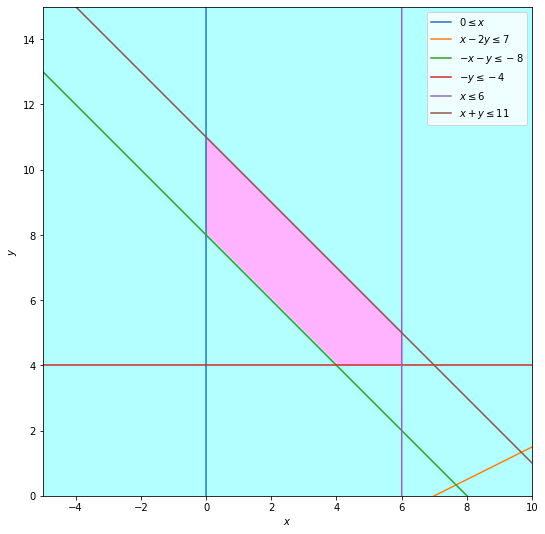

In [2]:
d = np.linspace(-10,25,400)
x,y = np.meshgrid(d,d)
plt.figure(figsize=(10,9))
plt.imshow( ((-2*y<=7-x) & (-y<=-8+x) & (-y<=-4) & (x>=0) & (x<=6)& (y<=11-x)).astype(int),extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="cool", alpha = 0.3);

x = np.linspace(-10, 25, 2000)
y1 = (x-7)/2
y2 = 8-x
y3 = np.array([4 for i in x])
y4 = np.array([6 for i in x])
y5 = 11-x

plt.plot(np.array([0 for i in x]), x, label=r'$0 \leq x$')
plt.plot(x, y1, label=r'$x-2y \leq 7$')
plt.plot(x, y2 , label=r'$-x-y \leq -8$')
plt.plot(x, y3, label=r'$-y \leq -4$')
plt.plot(y4, x, label=r'$x \leq 6$')
plt.plot(x, y5, label=r'$x+y \leq 11$')
plt.xlim(-5,10)
plt.ylim(0,15)
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

$\large \textbf{Ques 1.2}$ 

The pink shaded region in above figure is the feasible region of the given polytope and therefore the extreme points of given polytope are: $(4,4), (6,5),(6,4), (0,8), (0,11)$.

$\large \textbf{Que 1.4}$

In [3]:
def initial_sampling_points(m, n, d, total_iters):
  temp = []
  initial_pt = [0,8]
  temp.append(initial_pt)

  for i in range(n-1):
    initial_pt = [initial_pt[0],initial_pt[1]+d]
    temp.append(initial_pt)

  w = temp.copy()
  iterations = 0

  while iterations <= total_iters:
    x = np.random.uniform(0,6)
    y = np.random.uniform(4,11)
    z = np.random.randint(0,19)
    w = np.delete(w,z,axis=0)
    if 8 <= (x + y) <= 11:
      Y = np.array([x,y])
      if all(np.linalg.norm(w[j]-Y) >= d for j in range(len(w))) == True:
        temp[z] = Y
        iterations = iterations + 1
    w = temp.copy()


  return np.array(temp)

In [4]:
sample_points=initial_sampling_points(2,20,0.001,50)

print("Initial 20 samples")
print()
for i in sample_points:
  print(i)

Initial 20 samples

[0.15109213 8.8768374 ]
[3.36351762 5.39410724]
[2.17095828 6.74496981]
[3.71589839 5.67267587]
[ 0.19268423 10.41740539]
[0.84293236 9.08917249]
[5.63356197 4.07721717]
[1.11620406 8.93803493]
[ 0.3374653 10.0453633]
[1.27377185 8.29116452]
[3.54037437 6.2031994 ]
[0.94884721 7.1651261 ]
[1.67023063 8.08423512]
[4.20760246 6.72652082]
[4.26407801 4.48574726]
[0.66173515 7.58155382]
[2.15336348 8.84499801]
[4.70246336 4.47856228]
[1.26051271 8.91261145]
[0.    8.019]


$\large \textbf{Que 1.5}$

In [5]:
m=2
n=20
d=0.001
max_iters=[30, 50, 100, 200]

Maximum iterations: 30


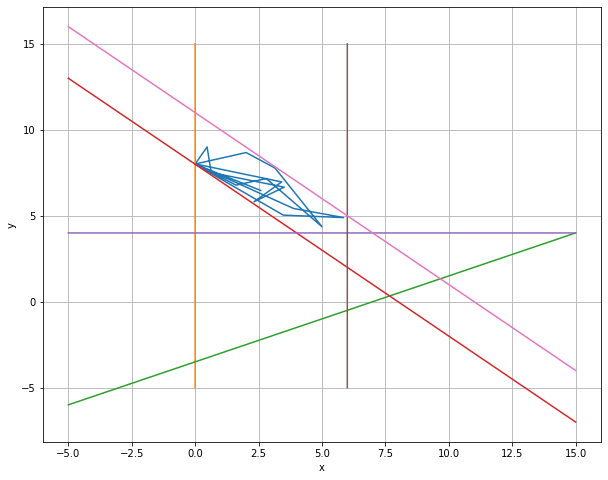


Maximum iterations: 50


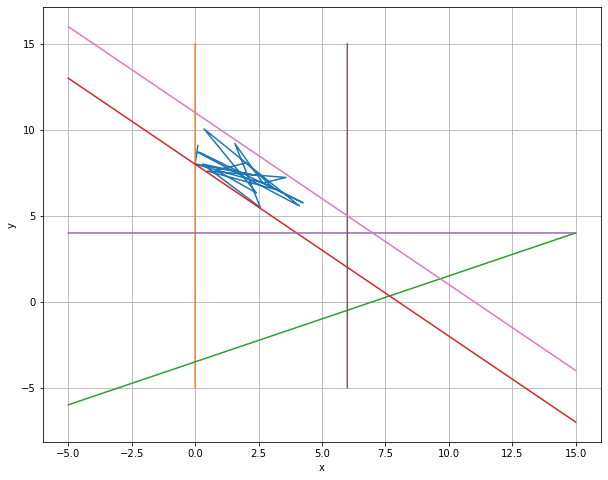


Maximum iterations: 100


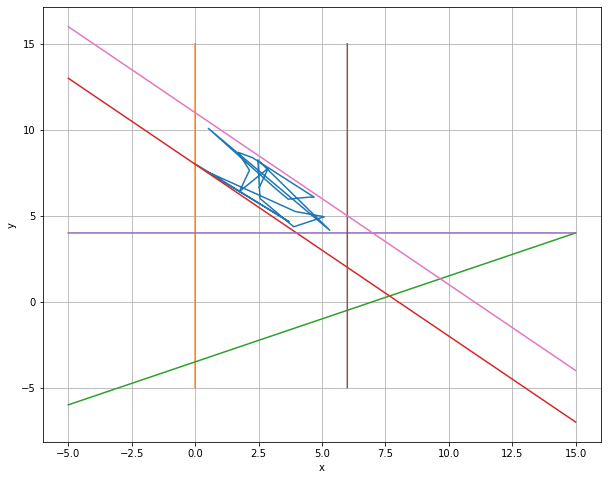


Maximum iterations: 200


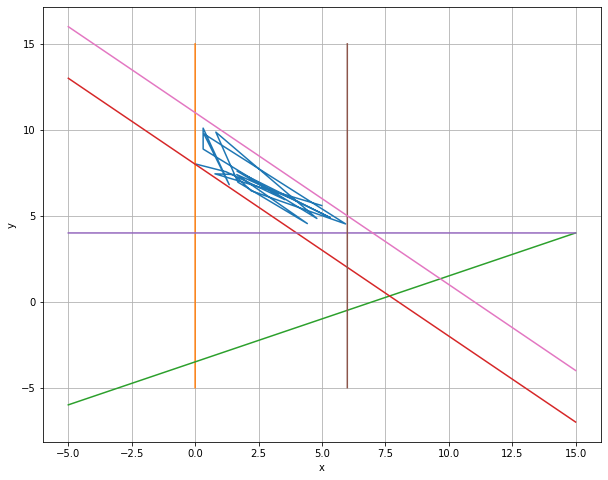

In [6]:
for iters in max_iters:
  print("Maximum iterations:", iters)
  X_values = initial_sampling_points(m, n, d, iters)
  plt.figure(figsize=(10,8))
  plt.grid()
  plt.plot(X_values[:,0], X_values[:,1])
  plt.xlabel('x')
  plt.ylabel('y')

  x = np.linspace(-5, 15, 2000)
  y1 = (x-7)/2
  y2 = 8-x
  y3 = np.array([4 for i in x])
  y4 = np.array([6 for i in x])
  y5 = 11-x
  plt.plot(np.array([0 for i in x]), x, label=r'$0 \leq x$')
  plt.plot(x, y1, label=r'$x-2y \leq 7$')
  plt.plot(x, y2 , label=r'$-x-y \leq -8$')
  plt.plot(x, y3, label=r'$-y \leq -4$')
  plt.plot(y4, x, label=r'$x \leq 6$')
  plt.plot(x, y5, label=r'$x+y \leq 11$')

  plt.show()
  print()

As we are increasing the max iterations we are getting feasible points more accurately.

$\large \textbf{Que 1.6}$

In [7]:
def area():
  feasible_region=[]
  iterations=0
  N = 10**6

  while iterations <= N:
    x = np.random.uniform(0,6)
    y = np.random.uniform(4,11)
    if 8 <= x+y <= 11:
      feasible_region.append([x, y])
    iterations=iterations+1
  
  area_of_polytope=42*(len(feasible_region)/N)
  return area_of_polytope

In [8]:
print('Area of the given polytope is :', area())

Area of the given polytope is : 16.029342


$\large \textbf{Que 1.7}$

In [9]:
def extreme_points(A,b):
  extreme_points=[]

  for i in range(len(A[:,0])-1):
    for j in range(i+1,len(A[:,0])):
      X=np.array([A[i],A[j]])
      c=0

      if np.linalg.det(X) != 0:
        s=np.dot(np.linalg.inv(X),np.array([b[i],b[j]]))
        for k in range(len(A[:,0])):
          if np.dot(A[k],s)<=b[k]:
            c = c + 1

      if c == len(A[:,0]):
        extreme_points.append(s)
  
  return extreme_points

In [10]:
A = np.array([[1, -2 ], [-1, -1], [0, -1], [1, 0], [1, 1], [-1, 0], [0, -1]])
b = np.array([7, -8, -4, 6, 11, 0, 0])
b = np.reshape(b, (7,1))

In [11]:
points=extreme_points(A, b)

for i in range(len(points)):
  print(tuple([points[i][0][0],points[i][1][0]]))

(4.0, 4.0)
(0.0, 8.0)
(6.0, 4.0)
(6.0, 5.0)
(0.0, 11.0)


$\Large\textbf{Ex 2}$

$\large\textbf{Que 2.1}$

The travelling salesman problem (also called the travelling salesperson problem or TSP) asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?"

In [12]:
TSP11=np.loadtxt('TSP11.csv',delimiter=',')
TSP48=np.loadtxt('TSP48.csv',delimiter=',')

$\large\textbf{Que 2.4}$

In [13]:
def cost(cost_matrix,sequence):

  n1 = len(sequence)
  tot_cost = 0

  for i in range(n1 - 1):
    tot_cost=tot_cost+cost_matrix[sequence[i]][sequence[i+1]]

  tot_cost=tot_cost+cost_matrix[sequence[len(sequence)-1]][sequence[0]]

  return tot_cost

$\large\textbf{Que 2.5}$

In [14]:
def neighbour(sequence, m, n):

   i=min(m,n)
   j=max(m,n)
   sequence=sequence.copy()

   while i < j:
      temp=sequence[j]
      sequence[j]=sequence[i]
      sequence[i]=temp
      i=i+1
      j=j-1
    
   return np.array(sequence)

In [15]:
def accept_prob(cost_old,cost_new,temperature):

  return np.exp(-(cost_new - cost_old)/temperature)

$\large \textbf{Que 2.6}$ 

The acceptance probability decreases when (1) new cost gets more worse than the current one and (2) temperature decreases.



In [16]:
def simulated_annealing(cost_matrix,initial_solution,initial_temperature,alpha,max_iters):

  cost_list=[]
  seq_old=initial_solution
  cost_old=cost(cost_matrix,seq_old)
  temp=initial_temperature
  n1=np.shape(cost_matrix)[0]

  for i in range(max_iters):
    n=np.random.randint(0,n1)
    while 1>0:
      m=np.random.randint(0,n1)
      if n != m:
        break
      
    sequence_new = neighbour(seq_old,m,n)
    cost_new=cost(cost_matrix,sequence_new)

    if cost_new<cost_old:
      seq_old,cost_old = sequence_new,cost_new
    else:
      if np.random.rand()<accept_prob(cost_old,cost_new,temp):
        seq_old,cost_old = sequence_new,cost_new
    
    cost_list.append(cost_old)
    temp=alpha*temp

  return seq_old,cost_old,cost_list

In [17]:
def cost_matrix_function(data):

  cost_matrix=[] 
  for line in data:
    cost_matrix.append(line)

  return np.array(cost_matrix)

$\large\textbf{Que 2.8}$

In [18]:
cost_matrix = cost_matrix_function(TSP11)
cost_matrix = cost_matrix.astype(float)

initial_solution = np.arange(np.shape(cost_matrix)[0])
random.shuffle(initial_solution)

initial_temperature = 1
alpha = 0.80
max_iters = 1000

opt_seq,opt_cost,cost_list = simulated_annealing(cost_matrix,initial_solution,initial_temperature,alpha,max_iters)

print('For T0 = ',1,' and alpha = ',0.80)
print('Sequence of cities at optimum is:',opt_seq)
print('Optimal cost:',opt_cost)

For T0 =  1  and alpha =  0.8
Sequence of cities at optimum is: [ 5  9  3  4  7  0  8 10  1  6  2]
Optimal cost: 253.0


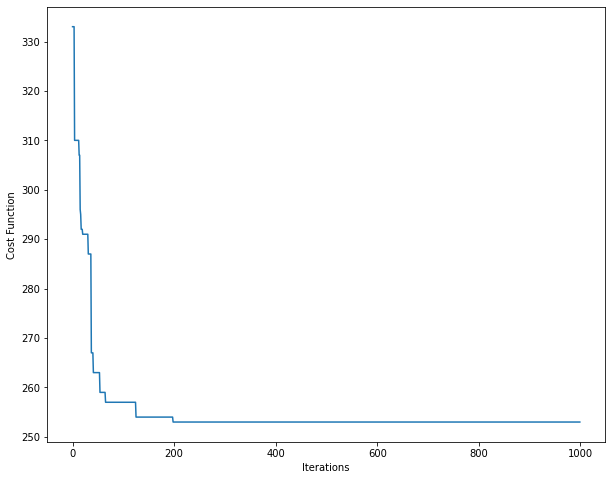

In [19]:
plt.figure(figsize=(10,8))

plt.plot(list(range(max_iters)), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

plt.show()

In [20]:
cost_matrix = cost_matrix_function(TSP11)
cost_matrix = cost_matrix.astype(float)

initial_solution = np.arange(np.shape(cost_matrix)[0])
random.shuffle(initial_solution)

initial_temperature = 5
alpha = 0.90
max_iters = 1000

opt_seq,opt_cost,cost_list = simulated_annealing(cost_matrix,initial_solution,initial_temperature,alpha,max_iters)

print('For T0 = ',5,' and alpha = ',0.90)
print('Sequence of cities at optimum is:',opt_seq)
print('Optimal cost:',opt_cost)

For T0 =  5  and alpha =  0.9
Sequence of cities at optimum is: [ 1  6  5  9  3  4  2  7  0  8 10]
Optimal cost: 256.0


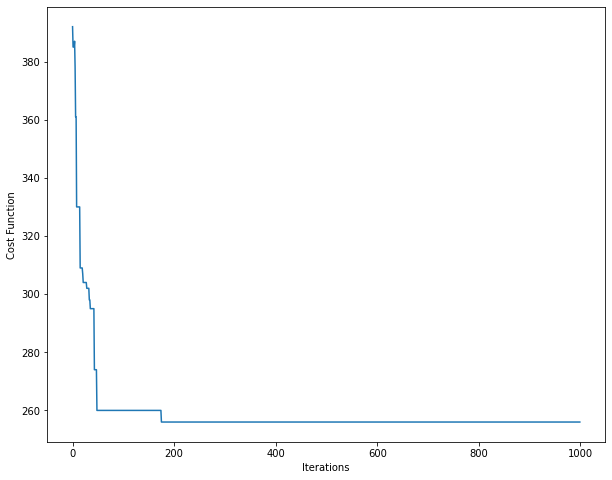

In [21]:
plt.figure(figsize=(10,8))

plt.plot(list(range(max_iters)), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

plt.show()

In [22]:
cost_matrix = cost_matrix_function(TSP11)
cost_matrix = cost_matrix.astype(float)

initial_solution = np.arange(np.shape(cost_matrix)[0])
random.shuffle(initial_solution)

initial_temperature = 1
alpha = 0.50
max_iters = 1000

opt_seq,opt_cost,cost_list = simulated_annealing(cost_matrix,initial_solution,initial_temperature,alpha,max_iters)

print('For T0 = ',1,' and alpha = ',0.50)
print('Sequence of cities at optimum is:',opt_seq)
print('Optimal cost:',opt_cost)

For T0 =  1  and alpha =  0.5
Sequence of cities at optimum is: [ 2  6  1 10  8  0  4  9  5  3  7]
Optimal cost: 255.0


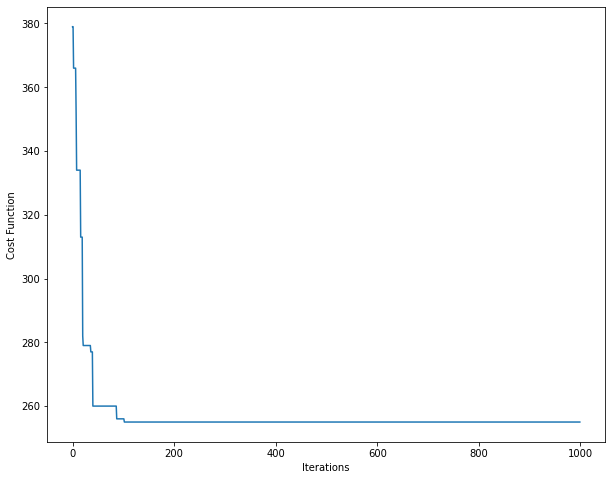

In [23]:
plt.figure(figsize=(10,8))

plt.plot(list(range(max_iters)), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

plt.show()

We are getting same results for different $T_0 \ and \ \alpha$.
ANd from the plot we can see that the algorithm converges to optimal value with few iterations only(around 50).

$\large\textbf{Que 2.9}$

New cooling schedule:

for $\alpha \geq 0, \hspace{4mm} T_k = \frac{T_0}{1 + \alpha k}$

In [24]:
def simulated_annealing_new(cost_matrix,initial_solution,initial_temperature,alpha,max_iters):

  cost_list=[]
  seq_old=initial_solution
  cost_old=cost(cost_matrix,seq_old)
  temp=initial_temperature
  n1=np.shape(cost_matrix)[0]

  for i in range(max_iters):
    n=np.random.randint(0,n1)
    while 1>0:
      m=np.random.randint(0,n1)
      if n != m:
        break
      
    sequence_new = neighbour(seq_old,m,n)
    cost_new=cost(cost_matrix,sequence_new)

    if cost_new<cost_old:
      seq_old,cost_old = sequence_new,cost_new
    else:
      if np.random.rand()<accept_prob(cost_old,cost_new,temp):
        seq_old,cost_old = sequence_new,cost_new
    
    cost_list.append(cost_old)
    
    temp=initial_temperature/(1+alpha*temp)

  return seq_old,cost_old,cost_list

In [25]:
cost_matrix = cost_matrix_function(TSP11)
cost_matrix = cost_matrix.astype(float)

initial_solution = np.arange(np.shape(cost_matrix)[0])
random.shuffle(initial_solution)

initial_temperature = 1
alpha = 0.80
max_iters = 1000

opt_seq,opt_cost,cost_list = simulated_annealing_new(cost_matrix,initial_solution,initial_temperature,alpha,max_iters)

print('For T0 = ',1,' and alpha = ',0.80)
print('Sequence of cities at optimum is:',opt_seq)
print('Optimal cost:',opt_cost)

For T0 =  1  and alpha =  0.8
Sequence of cities at optimum is: [ 9  3  4  7  0  8 10  1  6  2  5]
Optimal cost: 253.0


In [26]:
cost_matrix = cost_matrix_function(TSP11)
cost_matrix = cost_matrix.astype(float)

initial_solution = np.arange(np.shape(cost_matrix)[0])
random.shuffle(initial_solution)

initial_temperature = 5
alpha = 0.90
max_iters = 1000

opt_seq,opt_cost,cost_list = simulated_annealing_new(cost_matrix,initial_solution,initial_temperature,alpha,max_iters)

print('For T0 = ',5,' and alpha = ',0.90)
print('Sequence of cities at optimum is:',opt_seq)
print('Optimal cost:',opt_cost)

For T0 =  5  and alpha =  0.9
Sequence of cities at optimum is: [ 4  0  8 10  1  6  2  7  3  5  9]
Optimal cost: 255.0


In [27]:
cost_matrix = cost_matrix_function(TSP11)
cost_matrix = cost_matrix.astype(float)

initial_solution = np.arange(np.shape(cost_matrix)[0])
random.shuffle(initial_solution)

initial_temperature = 1
alpha = 0.50
max_iters = 1000

opt_seq,opt_cost,cost_list = simulated_annealing_new(cost_matrix,initial_solution,initial_temperature,alpha,max_iters)

print('For T0 = ',1,' and alpha = ',0.50)
print('Sequence of cities at optimum is:',opt_seq)
print('Optimal cost:',opt_cost)

For T0 =  1  and alpha =  0.5
Sequence of cities at optimum is: [ 5  9  3  4  7  0  8 10  1  6  2]
Optimal cost: 253.0


We are getting almost same results for the new colling schedule also.

$\large\textbf{Que 2.10}$

In [34]:
cost_matrix = cost_matrix_function(TSP48)
cost_matrix = cost_matrix.astype(float)

initial_solution = np.arange(np.shape(cost_matrix)[0])
random.shuffle(initial_solution)

initial_temperature = 1.
alpha = 0.80
max_iters = 10000
opt_sequence, opt_cost, cost_list = simulated_annealing(cost_matrix,initial_solution,initial_temperature,alpha,max_iters)

print('For T0 = ',1,' and alpha = ',0.80)
print('Sequence of cities at optimum is:',opt_sequence)
print('Optimal cost :',opt_cost)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


For T0 =  1  and alpha =  0.8
Sequence of cities at optimum is: [17  6 27  5 36 18 26 16 42 29 35 45 32 19 46 10 22 13 24 12 20 38 31 23
 41  9 44 34  3 25  1 28  4 47 33 40 15 21  2 39 11 14  8  0  7 37 30 43]
Optimal cost : 34738.0


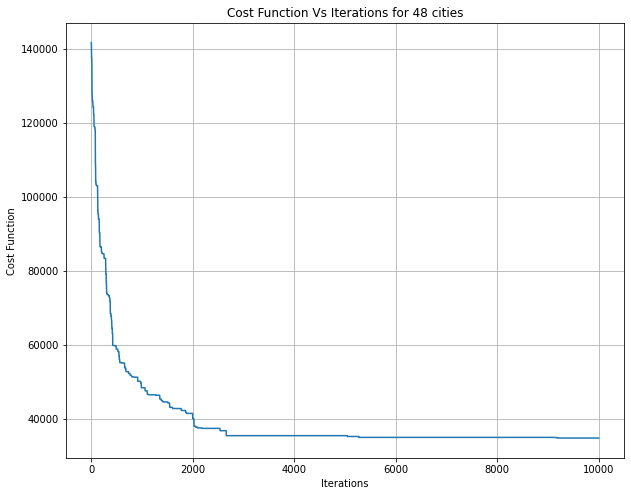

In [29]:
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(np.arange(max_iters), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function Vs Iterations for 48 cities')
plt.show()

In [35]:
cost_matrix = cost_matrix_function(TSP48)
cost_matrix = cost_matrix.astype(float)

initial_solution = np.arange(np.shape(cost_matrix)[0])
random.shuffle(initial_solution)

initial_temperature = 5
alpha = 0.90
max_iters = 1000

opt_seq,opt_cost,cost_list = simulated_annealing(cost_matrix,initial_solution,initial_temperature,alpha,max_iters)

print('For T0 = ',5,' and alpha = ',0.90)
print('Sequence of cities at optimum is:',opt_seq)
print('Optimal cost:',opt_cost)

For T0 =  5  and alpha =  0.9
Sequence of cities at optimum is: [40 25  3  9  1 28 47 33 12 24 13 22  2  4 41 34 44 23 38 31 20 46 10 11
 14  8 37 32 19 45 35 17 27  5 18 29 42 16 26 36  6 43 30 39  7  0 21 15]
Optimal cost: 46724.0


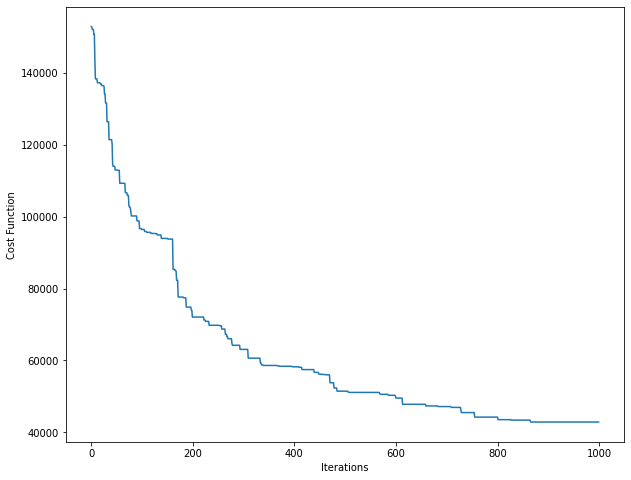

In [31]:
plt.figure(figsize=(10,8))

plt.plot(list(range(max_iters)), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

plt.show()

In [36]:
cost_matrix = cost_matrix_function(TSP48)
cost_matrix = cost_matrix.astype(float)

initial_solution = np.arange(np.shape(cost_matrix)[0])
random.shuffle(initial_solution)

initial_temperature = 1
alpha = 0.50
max_iters = 1000

opt_seq,opt_cost,cost_list = simulated_annealing(cost_matrix,initial_solution,initial_temperature,alpha,max_iters)

print('For T0 = ',1,' and alpha = ',0.50)
print('Sequence of cities at optimum is:',opt_seq)
print('Optimal cost:',opt_cost)

For T0 =  1  and alpha =  0.5
Sequence of cities at optimum is: [40 15  2 17 43 32  6 27  5 36 26 29 18 16 42 35 30 37  7  8  0 21 39 45
 14 19 46 11 10 22 24 13 12 20  9  3  1 25 41 34 44 23 31 38 47 33 28  4]
Optimal cost: 49578.0


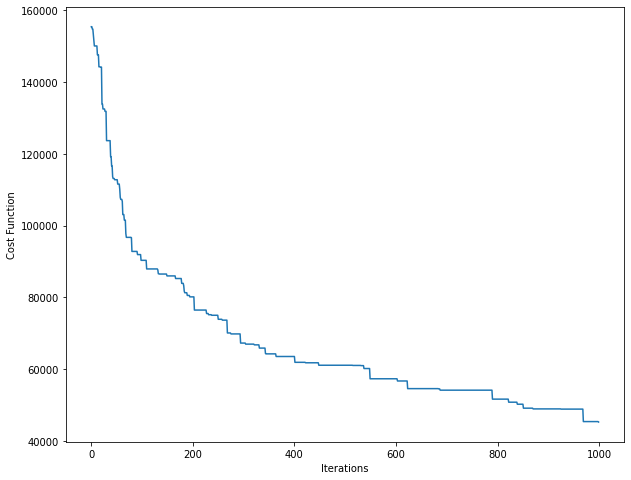

In [33]:
plt.figure(figsize=(10,8))

plt.plot(list(range(max_iters)), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

plt.show()

For 48 cities data after increasing initial temperature and alpha value we are getting higher cost and decreasing alpha(from 0.8) is also resulting in increase in cost.